In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("insurance.csv")
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [3]:

dataset

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16885
1,18,2,33.770,1,2,1726
2,28,2,33.000,3,2,4449
3,33,2,22.705,0,2,21984
4,32,2,28.880,0,2,3867
...,...,...,...,...,...,...
1333,50,2,30.970,3,2,10601
1334,18,1,31.920,0,2,2206
1335,18,1,36.850,0,2,1630
1336,21,1,25.800,0,2,2008


In [7]:
ind = dataset[['age','sex', 'bmi','children','smoker']]
ind

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,2,33.770,1,2
2,28,2,33.000,3,2
3,33,2,22.705,0,2
4,32,2,28.880,0,2
...,...,...,...,...,...
1333,50,2,30.970,3,2
1334,18,1,31.920,0,2
1335,18,1,36.850,0,2
1336,21,1,25.800,0,2


In [9]:
dep = dataset[['charges']]
dep

,charges
0,16885
1,1726
2,4449
3,21984
4,3867
...,...
1333,10601
1334,2206
1335,1630
1336,2008


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ind, dep, test_size=0.50, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
regressor = DecisionTreeRegressor(criterion='poisson', splitter='random')
regressor = regressor.fit(x_train,y_train)


[Text(0.30976899522391127, 0.9736842105263158, 'x[4] <= 1.402\npoisson = 4601.425\nsamples = 669\nvalue = 13474.572'),
 Text(0.13790956244864422, 0.9210526315789473, 'x[3] <= 1.431\npoisson = 2222.121\nsamples = 141\nvalue = 31432.553'),
 Text(0.0975939811010682, 0.868421052631579, 'x[0] <= 51.792\npoisson = 2284.237\nsamples = 90\nvalue = 30292.133'),
 Text(0.06798993426458505, 0.8157894736842105, 'x[2] <= 37.864\npoisson = 2355.52\nsamples = 69\nvalue = 28885.478'),
 Text(0.036883730484798684, 0.7631578947368421, 'x[2] <= 26.708\npoisson = 2127.424\nsamples = 63\nvalue = 27363.556'),
 Text(0.01626951520131471, 0.7105263157894737, 'x[0] <= 31.806\npoisson = 838.207\nsamples = 19\nvalue = 19948.211'),
 Text(0.008545603944124897, 0.6578947368421053, 'x[1] <= 1.842\npoisson = 86.962\nsamples = 8\nvalue = 16229.25'),
 Text(0.005258833196384552, 0.6052631578947368, 'x[3] <= 0.876\npoisson = 96.587\nsamples = 4\nvalue = 17074.75'),
 Text(0.002629416598192276, 0.5526315789473685, 'x[0] <= 21

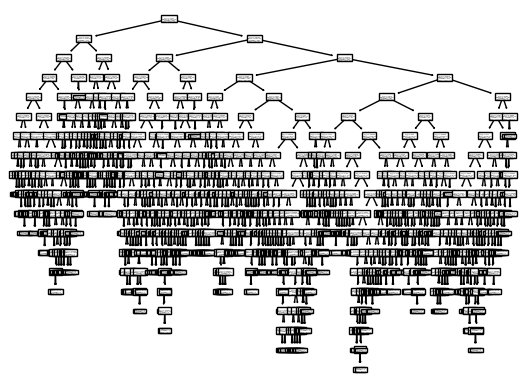

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)


In [18]:
y_pred=regressor.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)

In [20]:
print(r_score)

0.6677867160886103


In [21]:
import pickle
import numpy as np
filename = "Ins_dt.sav"
pickle.dump(regressor,open(filename,'wb'))

In [29]:
loaded_model=pickle.load(open("Ins_dt.sav",'rb'))
input_data = np.array([['40','1','23.5','3','1']])
result = loaded_model.predict(input_data)

print(result)

[21660.]


C:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
